In [3]:
!pip install librosa

   ---------------------------------------- 0.0/253.7 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/253.7 kB 1.3 MB/s eta 0:00:01
   ---------------- --------------------- 112.6/253.7 kB 930.9 kB/s eta 0:00:01
   -------------------------------------- - 245.8/253.7 kB 1.5 MB/s eta 0:00:01
   ---------------------------------------- 253.7/253.7 kB 1.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/185.0 kB ? eta -:--:--
   ---------------------------------------- 185.0/185.0 kB 5.6 MB/s eta 0:00:00


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

from glob import glob

import librosa
import librosa.display
import IPython.display as ipd

from itertools import cycle

sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

## ORIGINAL VOICE RECORDING VISUALIZATION

In [8]:
audio_files = glob('C:\\Users\\DHANALAKSHMI\\OneDrive\\Desktop\\SPECH AI\\SPEECH1_5_2.wav')


In [9]:
# Play audio file
ipd.Audio(audio_files[0])

In [10]:
y, sr = librosa.load(audio_files[0])
print(f'y: {y[:10]}')
print(f'shape y: {y.shape}')
print(f'sr: {sr}')

y: [-9.28362815e-14 -1.82469098e-13 -3.49319911e-13 -2.80505030e-13
  1.56861923e-13 -1.05432366e-13  7.06409079e-14 -1.44946257e-13
 -2.93978438e-13  1.72479489e-13]
shape y: (61152,)
sr: 22050


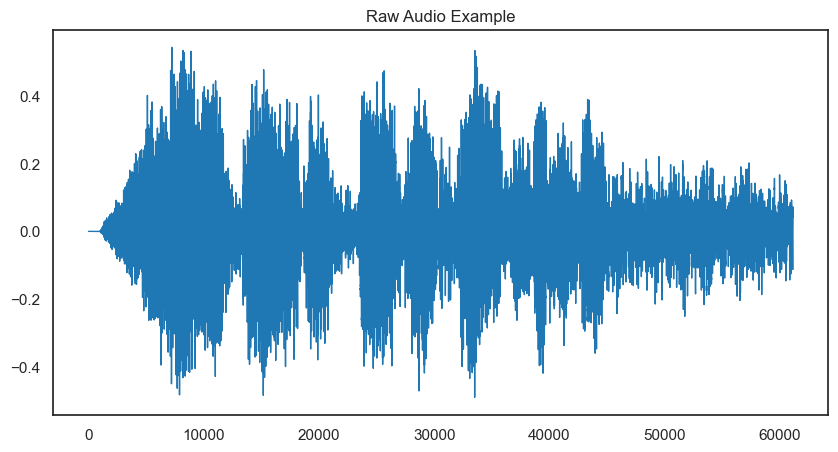

In [11]:
pd.Series(y).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio Example',
                 color=color_pal[0])
plt.show()

## SEGMENTATION AND TRIMMING OF VOICE

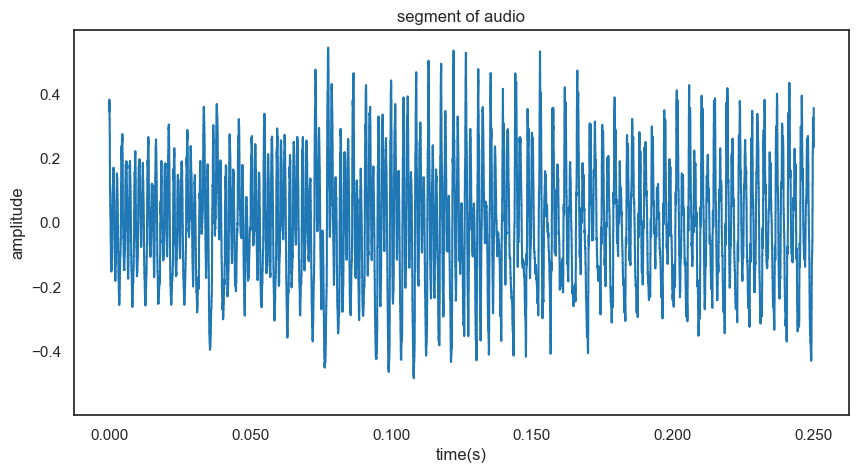

In [26]:
import IPython.display as ipd

# Specify the start and stop times in seconds
start_time = 0.25
stop_time = 0.5

# Extract the desired segment of the audio
segment = y[int(start_time * sr):int(stop_time * sr)]

plt.figure(figsize=(10,5))
librosa.display.waveshow(segment,sr=sr)
plt.title('segment of audio')
plt.xlabel('time(s)')
plt.ylabel('amplitude')
plt.show()

# Play the audio segment
ipd.Audio(segment, rate=sr)


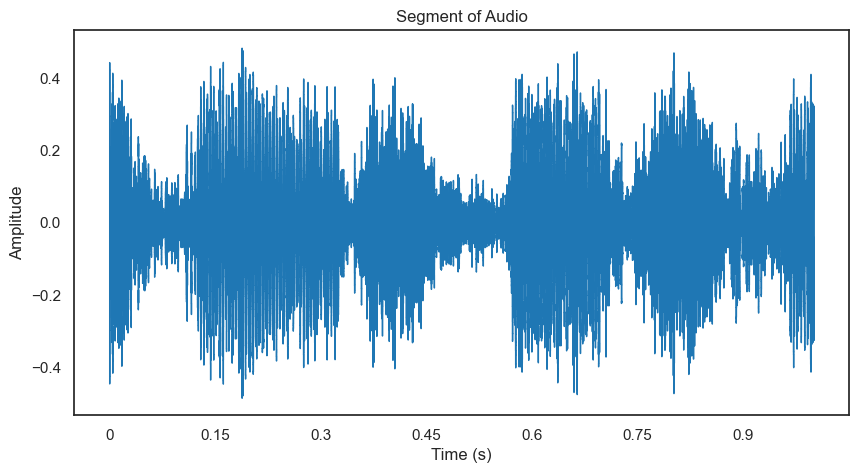

In [27]:
start_time = 0.5  
end_time = 1.5    

# Extract the segment of the audio
segment = y[int(start_time * sr):int(end_time * sr)]

# Plot the segment
plt.figure(figsize=(10, 5))
librosa.display.waveshow(segment, sr=sr)
plt.title('Segment of Audio')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

# Play the segment
ipd.Audio(segment, rate=sr)

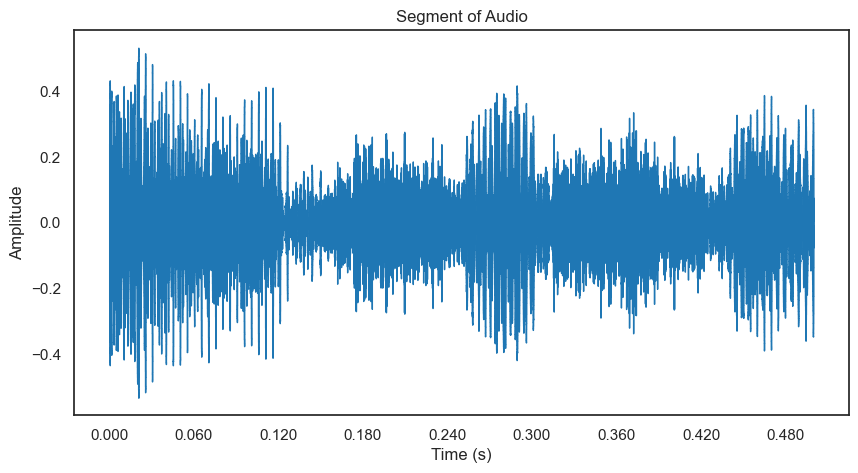

In [28]:
start_time = 1.5  
end_time = 2    

# Extract the segment of the audio
segment = y[int(start_time * sr):int(end_time * sr)]

# Plot the segment
plt.figure(figsize=(10, 5))
librosa.display.waveshow(segment, sr=sr)
plt.title('Segment of Audio')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

# Play the segment
ipd.Audio(segment, rate=sr)

## SAMPLING RATE CHANGE AND VISUALIZATION

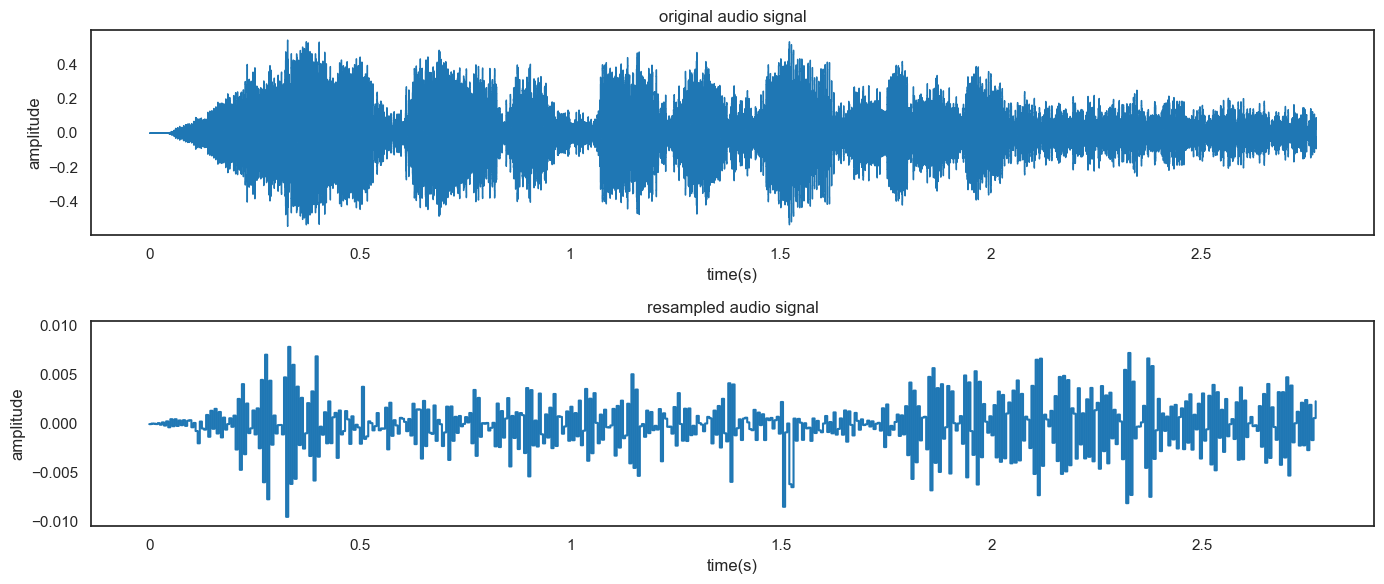

In [44]:
target_samplingrate=200
y_resample=librosa.resample(y,orig_sr=sr,target_sr=target_samplingrate)
plt.figure(figsize=(14,6))
plt.subplot(2,1,1)
librosa.display.waveshow(y,sr=sr)
plt.title('original audio signal')
plt.xlabel('time(s)')
plt.ylabel('amplitude')

plt.subplot(2,1,2)
librosa.display.waveshow(y_resample,sr=target_samplingrate)
plt.title('resampled audio signal')
plt.xlabel('time(s)')
plt.ylabel('amplitude')
plt.tight_layout()
plt.show()
           

In [45]:
# Play the resampled audio
ipd.Audio(y_resample, rate=target_samplingrate)

## AXVSPAN

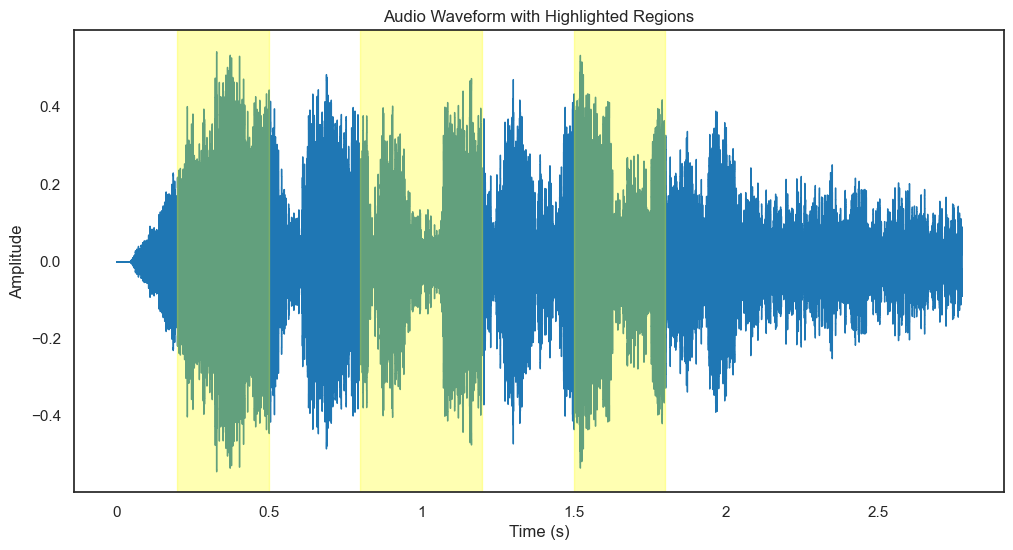

In [35]:

# Assuming you have specific time intervals you want to highlight (start and end points)
highlighted_regions = [(0.2, 0.5), (0.8, 1.2), (1.5, 1.8)]

# Plot the entire waveform
plt.figure(figsize=(12, 6))
librosa.display.waveshow(y, sr=sr)
plt.title('Audio Waveform with Highlighted Regions')

# Use axvspan to highlight specific regions
for start, end in highlighted_regions:
    plt.axvspan(start, end, color='yellow', alpha=0.3)

plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()
